### Exercice 2: Multiplication Matrice-Vecteur par bloc

In [1]:
import numpy as np

def mxm(A, v, p):
    if p <= 0:
        raise Exception("[p > 0; block_size must be greater than 0]")

    if len(A[0]) != len(v):
        raise Exception('[Can not make A.v; check dimension]')

    rows, cols = np.shape(A) 
    result = np.zeros(rows)

    # Multiplication des blocs
    for i in range(0, rows, p):
        for j in range(0, cols, p):
            for ii in range(i, min(i + p, rows)):
                s = 0
                for jj in range(j, min(j + p, cols)):
                    s += A[ii][jj] * v[jj]
                result[ii] += s

    return np.array(result)

* Test

In [2]:
n = 20

# Generation de A et v aleatoire
A = np.random.randint(30, size=(n, n))
v = np.random.randint(30, size=(n, 1))

# Test
bloc_size = 4
b = mxm(A, v, bloc_size)

print("Block version result: ")
print(b)
print("\nBasic version")
print(np.dot(A, v).T)

# check with standard np.dot
#assert np.array_equal(b, np.dot(A, v)), f"Oh problem"

Block version result: 
[4927. 4481. 3639. 4673. 3908. 5036. 3505. 4229. 4456. 4636. 5164. 3156.
 4710. 4668. 3113. 5327. 4202. 4008. 4088. 4578.]

Basic version
[[4927 4481 3639 4673 3908 5036 3505 4229 4456 4636 5164 3156 4710 4668
  3113 5327 4202 4008 4088 4578]]


* Tracer de la courbe de performance en temps CPU

In [3]:
import matplotlib.pyplot as plt
import time

def plot(n=200):
    bloc_sizes = [1, 2, 10, 100]
    cpu_time = []
    A = np.random.randint(10, size=(n, n))
    v = np.random.randint(10, size=(n, 1))

    # For each bloc size
    for bloc in bloc_sizes:
        start = time.time()
        b = mxm(A, v, bloc)
        end = time.time()
        cpu_time.append(end - start)

    # Plot performance
    plt.figure(figsize=(10,5))
    plt.plot(bloc_sizes, cpu_time, marker='o', label="CPU/Blocs")
    plt.xlabel("Block sizes")
    plt.ylabel("CPU TIME")
    plt.legend(loc='upper right')
    plt.show()

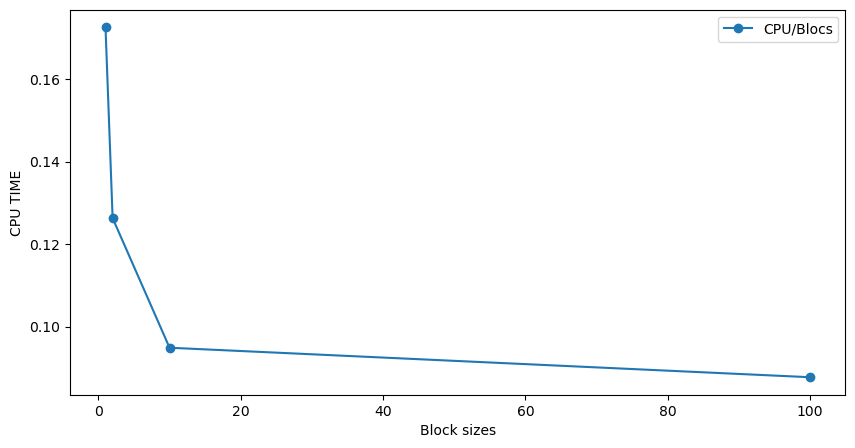

In [4]:
# Ici vous pouvez ajuster la tail de la natrice . Pour des raisons de rapidité on a pris 200

plot(200)

### Exercice 3: Profiling et Accélération

On a les fonctions suivantes :

In [5]:
import random

def sort_list(n):
    # Generatre a list of n random integers
    lst = [random.randint(0, 10000) for _ in range(n)]

    # Sort the list
    lst.sort()

    return lst

def fibonacci(n):
    if n <= 0:
        return 0
    elif n == 1:
        return 1
    else:
        return fibonacci(n-1) + fibonacci(n-2)

#### 3.1 Analyse des function avec cProfile

In [6]:
import cProfile, pstats

# Analyse de la premiere fonction
cProfile.run('sort_list(20)')

         176 function calls in 0.000 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.000    0.000 1594761689.py:3(sort_list)
        1    0.000    0.000    0.000    0.000 1594761689.py:5(<listcomp>)
        1    0.000    0.000    0.000    0.000 <string>:1(<module>)
       20    0.000    0.000    0.000    0.000 random.py:239(_randbelow_with_getrandbits)
       20    0.000    0.000    0.000    0.000 random.py:292(randrange)
       20    0.000    0.000    0.000    0.000 random.py:366(randint)
       60    0.000    0.000    0.000    0.000 {built-in method _operator.index}
        1    0.000    0.000    0.000    0.000 {built-in method builtins.exec}
       20    0.000    0.000    0.000    0.000 {method 'bit_length' of 'int' objects}
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}
       30    0.000    0.000    0.000    0.000 {method 'getrandbits' of 

In [7]:
# Analyse de la deuxime fonction
cProfile.run('fibonacci(30)')

         2692540 function calls (4 primitive calls) in 0.477 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
2692537/1    0.477    0.000    0.477    0.477 1594761689.py:12(fibonacci)
        1    0.000    0.000    0.477    0.477 <string>:1(<module>)
        1    0.000    0.000    0.477    0.477 {built-in method builtins.exec}
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}




#### 3.2 Explication de la sortie du profilage

* **sort_list**:

Ici la function est tres rapide déja seulement les fonctions random sont appelées splusieurs fois.

* **fibonacci**:

Ici on voit d'apres la sortie que cela necessite 2692537 appellke de la function fibonacci ce qui est asssez couteux en terme de temps CPU

#### 3.3 Version optimisée des deux fonctions

In [8]:
import random

# premiere fonction optimisée
def sort_list_fast(n):
    lst = [random.randint(0, 10000) for _ in range(n)]
    sorted_lst = sorted(lst)
    return sorted_lst

cProfile.run('sort_list_fast(20)')
# deuxieme fonction optimisée
def fibonacci_fast(n):
    a, b = 1, 1
    for i in range(n):
        a, b = a + b, a
    return a

         179 function calls in 0.000 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.000    0.000 3413231847.py:4(sort_list_fast)
        1    0.000    0.000    0.000    0.000 3413231847.py:5(<listcomp>)
        1    0.000    0.000    0.000    0.000 <string>:1(<module>)
       20    0.000    0.000    0.000    0.000 random.py:239(_randbelow_with_getrandbits)
       20    0.000    0.000    0.000    0.000 random.py:292(randrange)
       20    0.000    0.000    0.000    0.000 random.py:366(randint)
       60    0.000    0.000    0.000    0.000 {built-in method _operator.index}
        1    0.000    0.000    0.000    0.000 {built-in method builtins.exec}
        1    0.000    0.000    0.000    0.000 {built-in method builtins.sorted}
       20    0.000    0.000    0.000    0.000 {method 'bit_length' of 'int' objects}
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profi

* Test sort_list

In [9]:
cProfile.run('sort_list_fast(20)')

         184 function calls in 0.000 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.000    0.000 3413231847.py:4(sort_list_fast)
        1    0.000    0.000    0.000    0.000 3413231847.py:5(<listcomp>)
        1    0.000    0.000    0.000    0.000 <string>:1(<module>)
       20    0.000    0.000    0.000    0.000 random.py:239(_randbelow_with_getrandbits)
       20    0.000    0.000    0.000    0.000 random.py:292(randrange)
       20    0.000    0.000    0.000    0.000 random.py:366(randint)
       60    0.000    0.000    0.000    0.000 {built-in method _operator.index}
        1    0.000    0.000    0.000    0.000 {built-in method builtins.exec}
        1    0.000    0.000    0.000    0.000 {built-in method builtins.sorted}
       20    0.000    0.000    0.000    0.000 {method 'bit_length' of 'int' objects}
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profi

* Test fibonacci

In [10]:
cProfile.run('fibonacci_fast(30)')

         4 function calls in 0.000 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.000    0.000 3413231847.py:11(fibonacci_fast)
        1    0.000    0.000    0.000    0.000 <string>:1(<module>)
        1    0.000    0.000    0.000    0.000 {built-in method builtins.exec}
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}




D'apres les resultats de ce test on voit bien que cette function s'execute en bien moint de temps que la version naive

#### 3.4 Accélération avec numba

In [11]:
from numba import njit, prange

# Fibonacci accelerée avec numba
@njit(fastmath=True, parallel=True)
def fibonacci_fast(n: "int"):
    a, b = 1, 1
    for i in prange(n):
        a, b = a + b, a
    return a

In [12]:
from numba import njit, prange

# sort_list accelerée avec numba
@njit(fastmath=True, parallel=True)
def sort_list_fast(n: "int"):
    lst = [random.randint(0, 10000) for _ in range(n)]
    sorted_lst = sorted(lst)
    return sorted_lst

### Exercice 4: POO

In [13]:
# Import required file

import numpy as np
import matplotlib.pyplot as plt
from abc import ABC, abstractmethod

In [14]:
class PDE(ABC):
    @abstractmethod
    def set_equation(self):
        pass

    @abstractmethod
    def set_initial_conditions(self):
        pass

    @abstractmethod
    def set_boundary_conditions(self):
        pass


In [15]:
class HeatEquation(PDE):
    def set_heat_equation(self):
        self.type = "Heat Equation par difference finies"

    def set_initial_conditions(self, funct):
        self.initial_conditions = funct

    def set_boundary_conditions(self, funct):
        self.boundary_conditions = funct


In [16]:
class Solver(ABC):
    def solve():
        pass

In [17]:
class HeatEquationSolver(Solver, HeatEquation):
    def __init__(self, pde):
        self.pde = pde
    
    def solve(self, T, X, Y, dt, dx, dy):
        # ecrire 
        Nt = int(T / dt)
        Nx, Ny = len(X), len(Y)
        u = np.zeros((Nt+1, Nx, Ny))

        # Initialisation des conditions initiales
        for i in range(Nx):
            for j in range(Ny):
                u[0, i, j] = self.pde.initial_conditions(i, j)

        # Discretisation en temps zet en espace
        for n in range(Nt):
            for i in range(1, Nx - 1):
                for j in range(1, Nx - 1):
                    uxx = u[n, i-1,j] - 2*u[n, i,j] + u[n, i+1,j]
                    uyy = u[n, i,j-1] - 2*u[n, i,j] + u[n, i,j+1]
                    u[n+1, i, j] = u[n, i, j] + self.pde.D * (uxx + uyy) * dt
                    # ...

In [ ]:
https://cdn.mathpix.com/snip/images/OIR3cYCZG3b5qWUJkJpFnRxjmnHeXXozGfX8e80ERi0.original.fullsize.png